In [ ]:
# REGRESION LINEAL OSCAR ROCHA GÓMEZ

In [202]:
pip install numpy pandas scikit-learn matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [388]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [217]:
import os # sistema operativo
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
%matplotlib inline
import warnings
# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
# PASO 1: Análisis exploratorio de los datos para identificar relaciones entre variables, valores atipicos, tendencias, ect

In [22]:
os.getcwd()

'C:\\Users\\Oscar Rocha Gomez'

In [24]:
data = pd.read_csv("C:\\Users\\Oscar Rocha Gomez\\Documents\\UNAD\\16-04-II-2024\\ANALISIS DE DATOS\\car data.csv")

In [26]:
data # lectura de datos en phyton y lop cargargamos en la variable data_carros

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [28]:
data.head() # muesta las 5 primeras filas de nuestro data  set

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [30]:
data.tail() # muesta las 5 últimas  filas de nuestro data  set

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


Text(0.5, 1.0, 'Identificacion de datos faltantes y Atipicos')

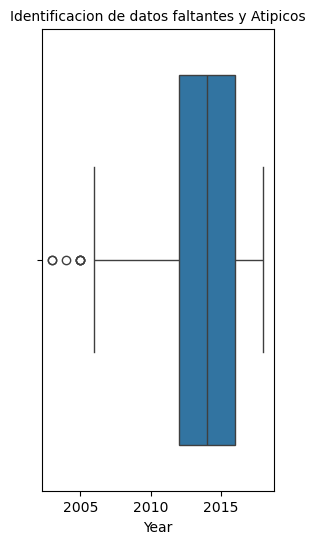

In [24]:
plt.figure(figsize=(3, 6))
sns.boxplot(x=data['Year'])
plt.title('Identificacion de datos faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de datos faltantes y Atipicos')

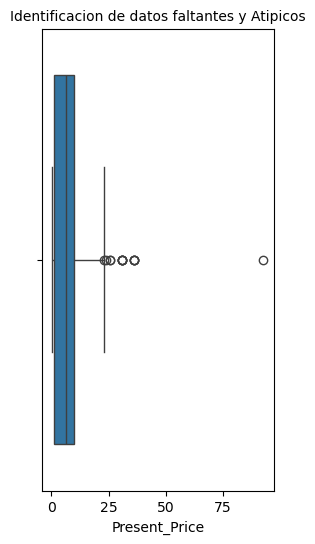

In [26]:
plt.figure(figsize=(3, 6))
sns.boxplot(x=data['Present_Price'])
plt.title('Identificacion de datos faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y Atipicos')

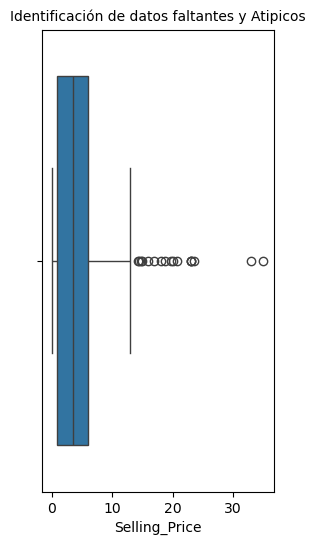

In [30]:
plt.figure(figsize=(3, 6))
sns.boxplot(x=data['Selling_Price'])
plt.title('Identificación de datos faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y Atipicos')

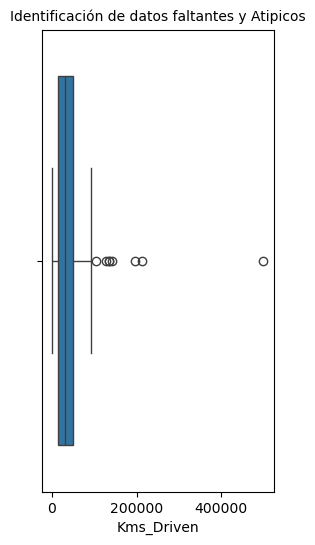

In [34]:
plt.figure(figsize=(3, 6))
sns.boxplot(x=data['Kms_Driven'])
plt.title('Identificación de datos faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y Atipicos')

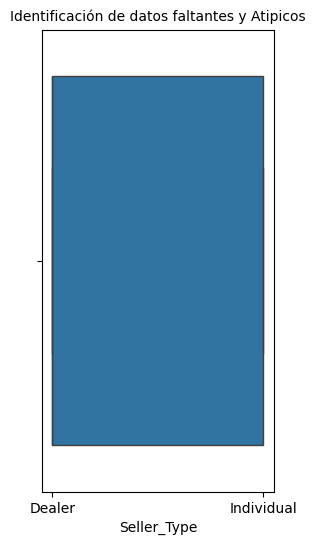

In [36]:
plt.figure(figsize=(3, 6))
sns.boxplot(x=data['Seller_Type'])
plt.title('Identificación de datos faltantes y Atipicos', fontsize=10)

In [44]:
sorted(data['Selling_Price'],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [50]:
data = data[~(data['Selling_Price']>=33.0) & (data['Selling_Price']<=35.0)]

In [ ]:
# PASO 2, Procesar los datos limpiandolos, tratando valores faltantes y transformandolos segun sea necesario.

In [54]:

data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [66]:
# revision de datos faltantantes 

print("Cantidad de registros con cero en Car_Name: ", data['Car_Name'].isin([0]).sum())
print("Cantidad de registros con cero en Year: ", data['Year'].isin([0]).sum())
print("Cantidad de registros con cero en Selling_Price: ", data['Selling_Price'].isin([0]).sum())
print("Cantidad de registros con cero en Present_Price: ", data['Present_Price'].isin([0]).sum())
print("Cantidad de registros con cero en Fuel_Type: ", data['Fuel_Type'].isin([0]).sum())
print("Cantidad de registros con cero en Seller_Type: ", data['Seller_Type'].isin([0]).sum())
print("Cantidad de registros con cero en Transmission: ", data['Transmission'].isin([0]).sum())
print("Cantidad de registros con cero en Owner: ", data['Owner'].isin([0]).sum())

Cantidad de registros con cero en Car_Name:  0
Cantidad de registros con cero en Year:  0
Cantidad de registros con cero en Selling_Price:  0
Cantidad de registros con cero en Present_Price:  0
Cantidad de registros con cero en Fuel_Type:  0
Cantidad de registros con cero en Seller_Type:  0
Cantidad de registros con cero en Transmission:  0
Cantidad de registros con cero en Owner:  288


In [38]:
data.shape # Conocer el número de filas y columnas de nuestro data set

(301, 9)

In [40]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])


Number of Rows 301
Number of Columns 9


In [52]:
data.info() # obtener informacion acerca de la dataset como el total de filas, el total de columnas y el tipo de datos de cada columna y la memoria requerida

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [ ]:
# PASO 3 Seleccionar caracteristicas más relevantes para entrenar el modelo utilizando la selección de caractéres

In [ ]:
# Revisar los valores nullos de la Base de Datos

In [68]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [70]:
data.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [ ]:
#Obtenemos estadísticas generales sobre el conjunto de datos

In [44]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# procesamos la información

In [48]:
import datetime

In [50]:
date_time = datetime.datetime.now()

In [52]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [54]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Eliminamos los valores Atipicos

In [56]:
import seaborn as sns

<Axes: ylabel='Selling_Price'>

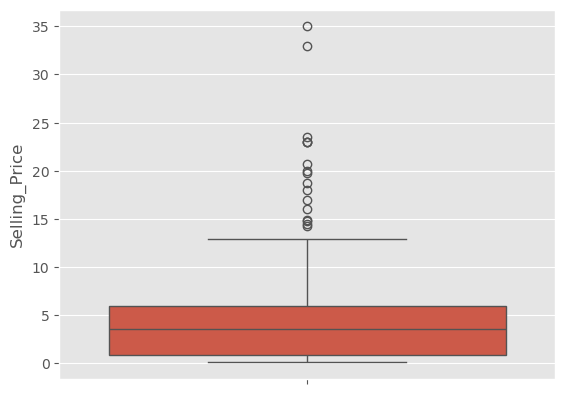

In [58]:
sns.boxplot(data['Selling_Price'])

In [108]:
sorted(data['Selling_Price'],reverse=True)

[23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.65,
 3.6,
 3.51

In [ ]:
# PASO 4 Dividir el dataset en train y test para evaluar correctamente el modelo a desarrollar.

In [64]:
data['Fuel_Type'].unique()


array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [66]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [68]:
data['Fuel_Type'].unique()


array([0, 1, 2], dtype=int64)

In [70]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [72]:
data['Seller_Type'] = data['Seller_Type'].map({'Dealer':0,'Individual':1})

In [74]:
data['Seller_Type'].unique()

array([0, 1], dtype=int64)

In [76]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [78]:
data['Transmission'] =data['Transmission'].map({'Manual':0,'Automatic':1})

In [80]:
data['Transmission'].unique()

array([0, 1], dtype=int64)

In [88]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [90]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
y = data['Selling_Price']

In [96]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split

In [92]:
# Dividir los datos para entrenamiento (train)= 75% , y para prueba (Test) =25%
# se crean las variables x, y, para almacenar la informacion del entranamiento de nuestro modelo

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [94]:
print (X_train)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
129  2017           0.84        5000          0            1             0   
232  2015          14.79       12900          0            0             1   
195  2015           0.32       35000          0            1             0   
277  2015          13.60       21780          0            0             0   
280  2015           5.90       14465          0            0             0   
..    ...            ...         ...        ...          ...           ...   
188  2013           0.57       18000          0            1             0   
71   2011          12.48       45000          1            0             0   
106  2014           3.45       16500          0            1             0   
270  2011          10.00       69341          0            0             0   
102  2017           1.78        4000          0            1             0   

     Owner  
129      0  
232      0  
195      0  
277      0 

In [183]:
print (y_train)

227     2.55
79     14.50
67      9.25
298     3.35
194     0.20
       ...  
190     0.20
72      7.45
108     1.20
272     7.50
104     1.35
Name: Selling_Price, Length: 224, dtype: float64


In [185]:
print (X_test)

     Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  \
283          11.80        9010          0            0             0      0   
267           9.40       19434          1            0             0      0   
166           0.55        1000          0            1             0      0   
9             8.92       42367          1            0             0      0   
78           22.83       80000          0            0             1      0   
..             ...         ...        ...          ...           ...    ...   
128           0.87        3000          0            1             0      0   
230           9.40       45000          1            0             0      0   
285           8.50       15059          0            0             1      0   
257          13.60       40324          0            0             0      0   
160           0.95       24000          0            1             0      0   

     Age  
283    8  
267    8  
166    8  
9      

In [187]:
print (y_test)

283    8.99
267    8.35
166    0.45
9      7.45
78     5.25
       ... 
128    0.80
230    6.15
285    7.40
257    8.50
160    0.45
Name: Selling_Price, Length: 75, dtype: float64


In [ ]:
# Almcenar en la matriz de correlación en X y en el vector Y 

In [157]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
y = data['Selling_Price']

In [159]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [124]:
from sklearn.model_selection import train_test_split

In [126]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
 # Entrenamiento del modelo

In [178]:
Kms_Driven = data ['Kms_Driven']
Transmission = data ['Transmission']
Selling_Price = data ['Selling_Price']
Fuel_Type = data ['Fuel_Type']
Present_Price = ['Present_Price']
Year = data ['Year']

In [180]:
from matplotlib import style

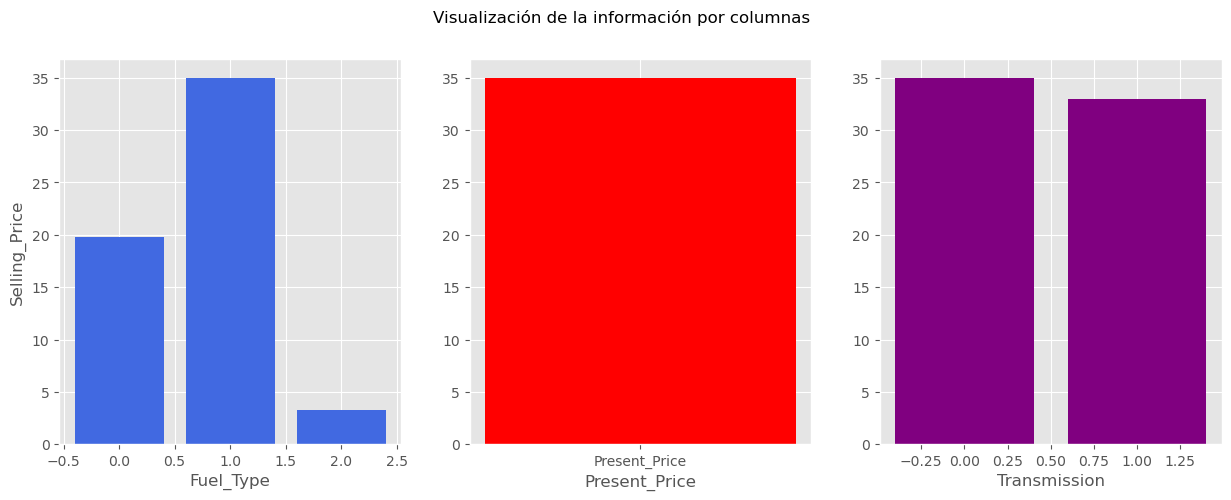

In [168]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualización de la información por columnas')
plt.subplot(1,3,1)
plt.bar(Fuel_Type,Selling_Price, color='royalblue')
plt.xlabel("Fuel_Type")
plt.ylabel("Selling_Price")
plt.subplot(1,3,2)
plt.bar(Present_Price,Selling_Price, color='red')
plt.xlabel("Present_Price")
plt.subplot(1,3,3)
plt.bar(Transmission,Selling_Price, color='purple')
plt.xlabel("Transmission")
plt.show()


<Axes: xlabel='Transmission', ylabel='Selling_Price'>

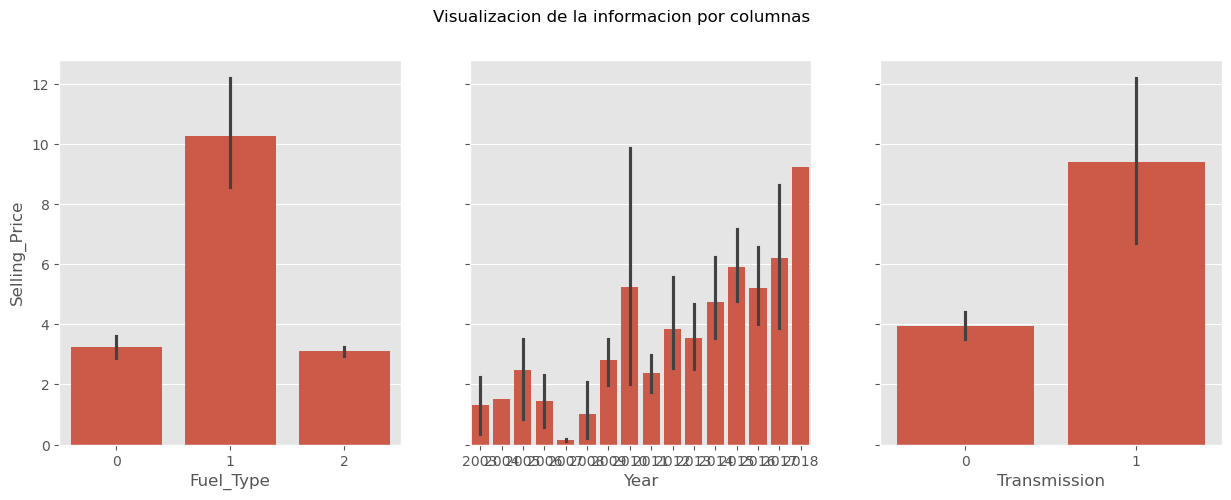

In [182]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizacion de la informacion por columnas')
sns.barplot(x=Fuel_Type, y=Selling_Price, ax=axes[0])
sns.barplot(x=Year, y=Selling_Price, ax=axes[1])   
sns.barplot(x=Transmission, y=Selling_Price, ax=axes[2])            
            


In [184]:
from sklearn.model_selection import train_test_split

In [186]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [237]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)



GradientBoostingRegressor()

In [229]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)


In [ ]:
# evaluamos el algoritmo

In [239]:
from sklearn import metrics

In [291]:
score0 = metrics.r2_score(y_test,y_pred1)
score1 = metrics.r2_score(y_test,y_pred2)
score2 = metrics.r2_score(y_test,y_pred3)


In [293]:
print(score1,score2,score3,)

0.9663801121329292 0.9719502808689116 0.9719502808689116


In [295]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR',],
             "R2_SCORE":[score0,score1,score2,]})

In [287]:
final_data

,Models,R2_SCORE
0,LR,0.846805
1,RF,0.966380
2,GBR,0.971950


<Axes: title={'center': 'Correlación entre el Modelo del Vehiculo frente al precio de venta'}, xlabel='Year', ylabel='Selling_Price'>

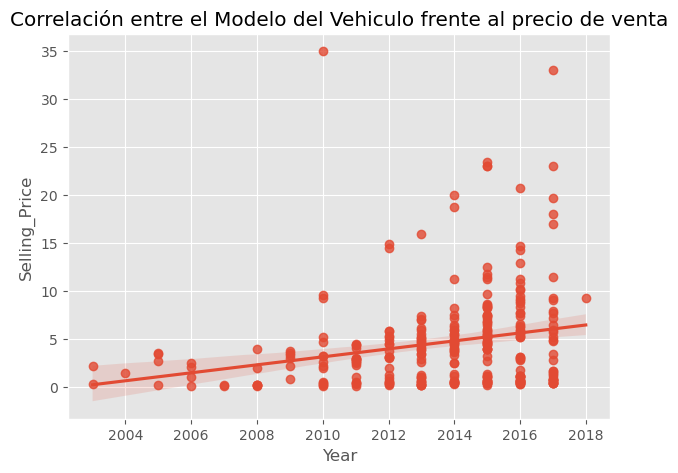

In [269]:
fig=plt. figure(figsize=(7,5))
plt.title('Correlación entre el Modelo del Vehiculo frente al precio de venta')
sns.regplot(x='Year', y= 'Selling_Price', data=data)

<Axes: title={'center': 'Correlación entre el Precio Actual y el precio de venta'}, xlabel='Present_Price', ylabel='Selling_Price'>

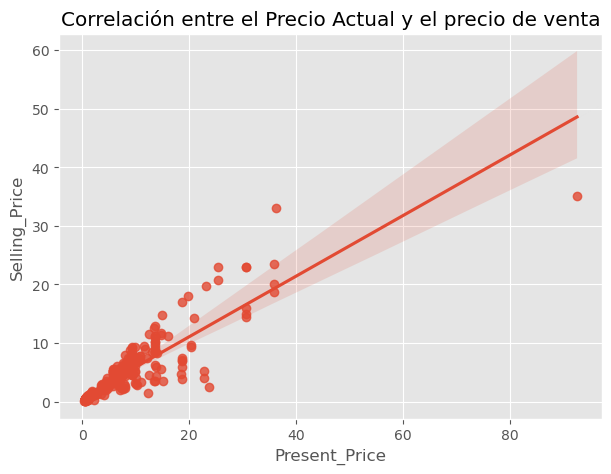

In [267]:
fig=plt. figure(figsize=(7,5))
plt.title('Correlación entre el Precio Actual y el precio de venta')
sns.regplot(x='Present_Price', y= 'Selling_Price', data=data)

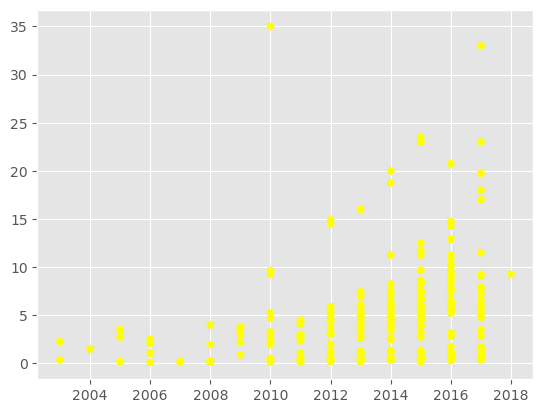

In [398]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 1990 y 2020
# y en el eje Y: entre 2004 y 2018
filtered_data = data[(data['Year'] <= 2018) & (data['Selling_Price'] <= 600000)]
 
colores=['red','yellow']
tamaños=[25,75]
 
f1 = filtered_data['Year'].values
f2 = filtered_data['Selling_Price'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Year']>2018):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamaños[0])
plt.show()

In [ ]:
# PASO 6  evaluacion del modelo 

In [301]:
import joblib

In [313]:
import pandas as pd
data_new = pd.DataFrame({
    'Present_Price':5.59,
    'Kms_Driven':27000,
    'Fuel_Type':0,
    'Seller_Type':0,
    'Transmission':0,
    'Owner':0,
    'Age':8
},index=[0])